TASK 1

# IMAGE RESIZING


In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [13]:
# Load your image
image_path = "Picture1.jpg"  # Replace with your image path
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)  # Decodes into an RGB image

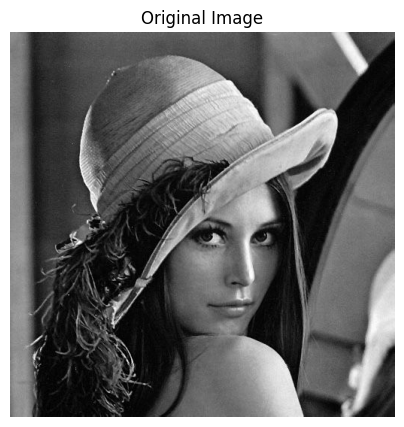

In [14]:
# Display the original image
plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(image.numpy() / 255.0)  # Normalize for display
plt.axis('off')
plt.show()

In [15]:
target_size = (200, 200)  # Target dimensions (height, width)
linear_resized = tf.image.resize(image, target_size, method='bilinear')
nearest_resized = tf.image.resize(image, target_size, method='nearest')
bicubic_resized = tf.image.resize(image, target_size, method='bicubic')

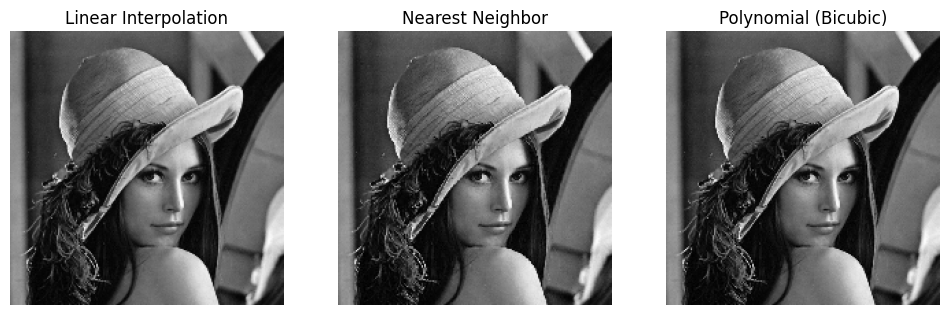

In [16]:
# Display resized images
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Linear Interpolation")
plt.imshow(linear_resized.numpy() / 255.0)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Nearest Neighbor")
plt.imshow(nearest_resized.numpy() / 255.0)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Polynomial (Bicubic)")
plt.imshow(bicubic_resized.numpy() / 255.0)
plt.axis('off')

plt.show()

# IMAGE BLURRING

In [17]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [18]:
# Apply Box Blur
box_blurred = cv2.blur(image, (8,8 ))  # Kernel size (5, 5)

# Apply Gaussian Blur
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel size (5, 5), sigma=0

# Apply Adaptive (Bilateral) Blur
adaptive_blurred = cv2.bilateralFilter(image, d=9, sigmaColor=70, sigmaSpace=70)

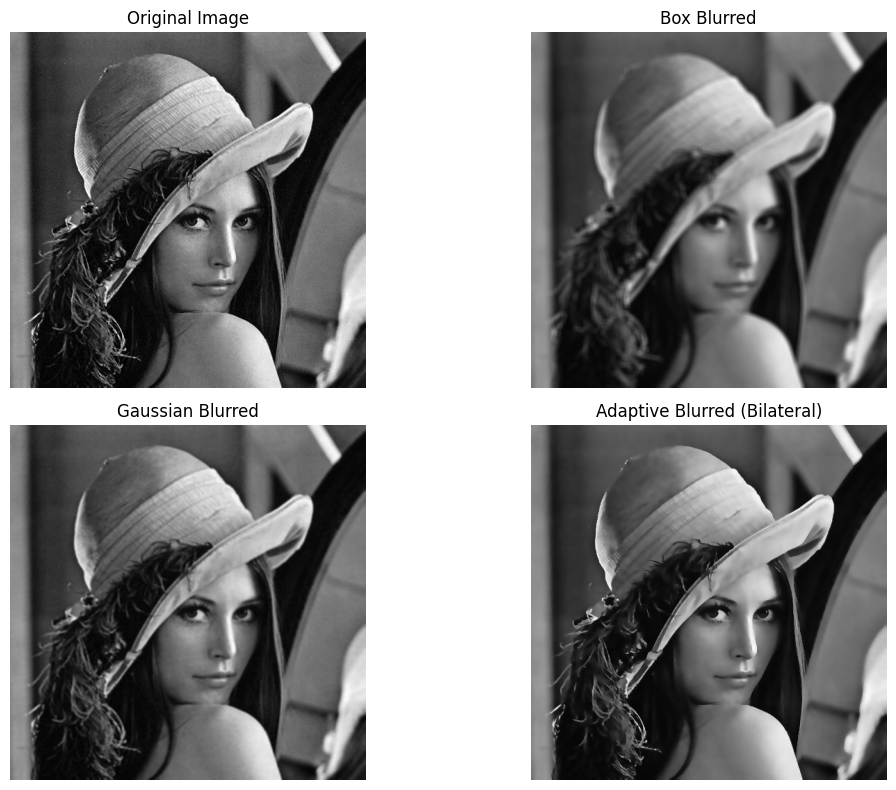

In [19]:
# Create subplots to display the results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

# Box Blurred Image
plt.subplot(2, 2, 2)
plt.title("Box Blurred")
plt.imshow(box_blurred)
plt.axis("off")

# Gaussian Blurred Image
plt.subplot(2, 2, 3)
plt.title("Gaussian Blurred")
plt.imshow(gaussian_blurred)
plt.axis("off")

# Adaptive Blurred Image
plt.subplot(2, 2, 4)
plt.title("Adaptive Blurred (Bilateral)")
plt.imshow(adaptive_blurred)
plt.axis("off")

# Show the plot
plt.tight_layout()
plt.show()

TASK 2

In [20]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [21]:
(x, y), (x_test, y_test) = mnist.load_data()


x = x / 255.0  # Normalize training data
x_test = x_test / 255.0
y_onehot = to_categorical(y, num_classes=10)  # One-hot encode labels
y_test_onehot = to_categorical(y_test, num_classes=10)


kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross Validation


accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
conf_matrix_sum = np.zeros((10, 10))


kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8494 - loss: 0.5212 - val_accuracy: 0.9570 - val_loss: 0.1411
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9542 - loss: 0.1501 - val_accuracy: 0.9608 - val_loss: 0.1275
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9647 - loss: 0.1123 - val_accuracy: 0.9712 - val_loss: 0.0978


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix for Fold 1:
[[1151    0    3    0    4    5    8    0    3    1]
 [   0 1303    4    9    1    0    1    3    1    0]
 [   1    3 1142    5    0    2    4    9    7    1]
 [   1    0    5 1174    1   14    0    5   13    6]
 [   0    1    1    1 1146    1    7    2    0   17]
 [   8    2    1   15    3 1062    4    1    4    4]
 [   3    0    2    0    1    4 1163    0    4    0]
 [   0    3   12   11    3    1    0 1256    6    7]
 [   5    2    4    7    6    7    4    1 1117    7]
 [   2    1    0    1   20    6    1   18    5 1140]]


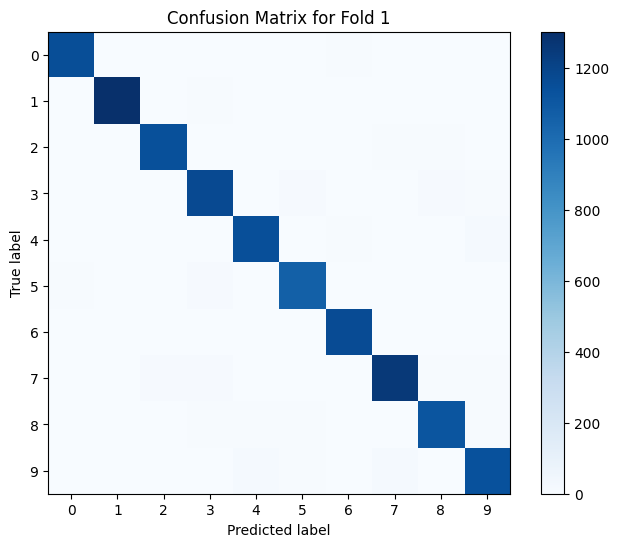

Fold 1 - Accuracy: 0.9712, AUC: 0.9992


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8473 - loss: 0.5125 - val_accuracy: 0.9555 - val_loss: 0.1455
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9546 - loss: 0.1483 - val_accuracy: 0.9649 - val_loss: 0.1223
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9661 - loss: 0.1120 - val_accuracy: 0.9677 - val_loss: 0.1091


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix for Fold 2:
[[1174    0    2    1    0    1    1    2    4    4]
 [   0 1332    8    0    2    0    1    2    3    2]
 [   2    1 1116    4    5    1    0    7    9    3]
 [   1    2   19 1184    1   23    0    9   12   14]
 [   0    2    4    0 1136    1    4    2    2    7]
 [   6    1    1    5    2 1069    5    1   11   10]
 [   8    3   10    0    9    4 1205    0    0    0]
 [   0    3   10    3    6    0    0 1182    0   13]
 [   2   11    2    7   11   14    5    0 1068   25]
 [   5    2    0    3   16    2    0    3    1 1146]]


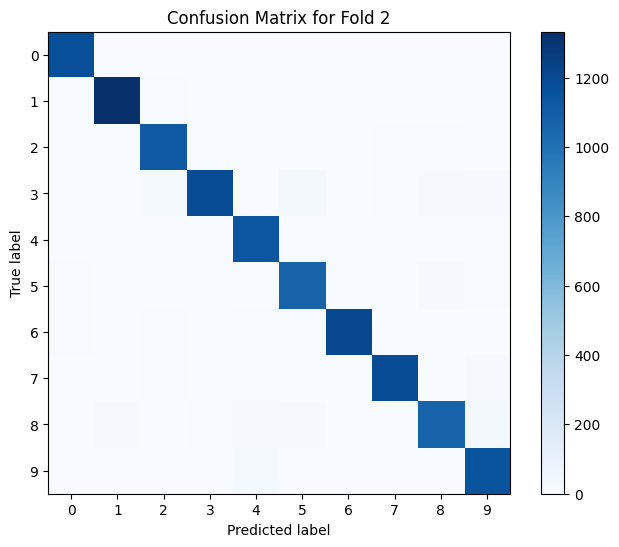

Fold 2 - Accuracy: 0.9677, AUC: 0.9990


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8483 - loss: 0.5117 - val_accuracy: 0.9571 - val_loss: 0.1416
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9541 - loss: 0.1486 - val_accuracy: 0.9657 - val_loss: 0.1121
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9627 - loss: 0.1202 - val_accuracy: 0.9663 - val_loss: 0.1079


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix for Fold 3:
[[1173    0    6    1    1    0    5    2    3    1]
 [   0 1318    5    3    0    0    0    2    0    0]
 [   5    4 1184   14    3    2    3    5    2    1]
 [   1    2    9 1141    1    9    2    2   17    5]
 [   0    5    5    1 1102    0    7    1    9   19]
 [   1    2    2   22    1 1038   16    0    7    7]
 [   1    3    3    0    4    4 1171    0    2    0]
 [   2    7    8   10    8    1    1 1212    4   12]
 [   1   14    6   23    0    4    4    1 1126    2]
 [   0    5    1    9    7    6    1   12   17 1131]]


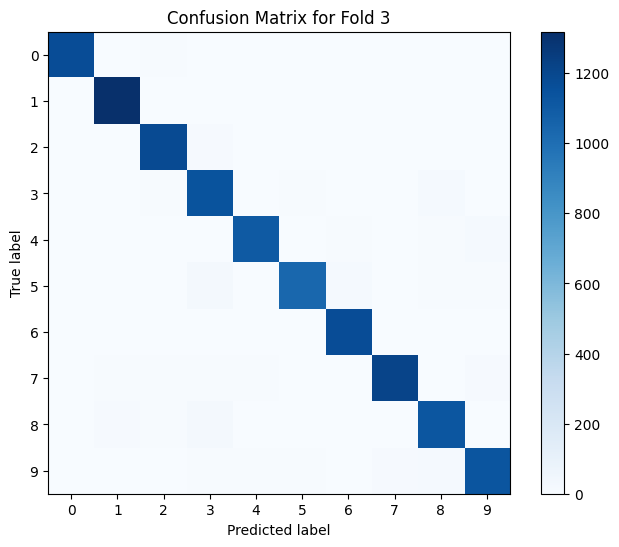

Fold 3 - Accuracy: 0.9663, AUC: 0.9990


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8488 - loss: 0.5183 - val_accuracy: 0.9555 - val_loss: 0.1510
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9512 - loss: 0.1585 - val_accuracy: 0.9623 - val_loss: 0.1200
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9616 - loss: 0.1200 - val_accuracy: 0.9671 - val_loss: 0.1108


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix for Fold 4:
[[1187    1    1    0    1    1    0    0    3    1]
 [   1 1338    4    2    1    1    1    5    2    0]
 [   3    7 1164    2    4    0    2   10    4    1]
 [   3    2   15 1233    1   20    0    1   13    5]
 [   1    2    5    0 1157    0    7    5    3   40]
 [   6    1    4    7    3  980   22    2    8   11]
 [  11    1    1    1    4    2 1083    0    3    1]
 [   5    3    5    2    1    0    0 1199    1   10]
 [   8    8    6    6    3    7   10    1 1102   10]
 [   7    0    1    3   10    3    1    9    6 1162]]


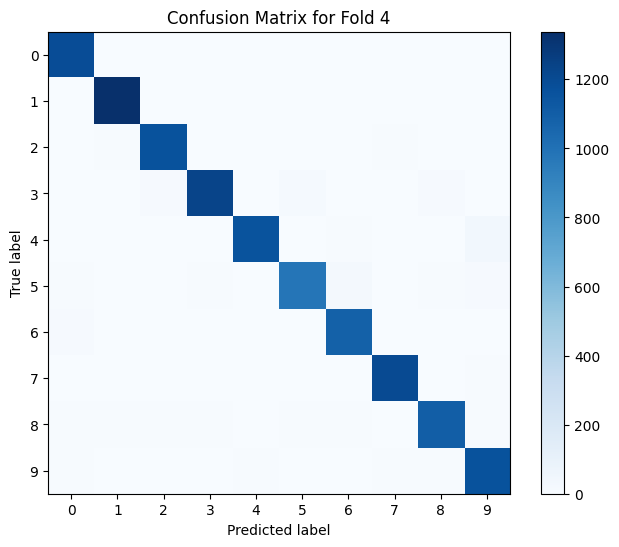

Fold 4 - Accuracy: 0.9671, AUC: 0.9990


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8376 - loss: 0.5478 - val_accuracy: 0.9534 - val_loss: 0.1541
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9505 - loss: 0.1598 - val_accuracy: 0.9633 - val_loss: 0.1192
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9654 - loss: 0.1124 - val_accuracy: 0.9654 - val_loss: 0.1087


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix for Fold 5:
[[1160    0    1    0    0    1    5    0    3    2]
 [   1 1361    4    2    1    0    3    3   11    1]
 [   9    3 1140   26    6    1    2   13   13    3]
 [   1    1    5 1127    0    7    2    9   11    2]
 [   4    2    0    0 1115    0    4    1    1   12]
 [   3    1    0   17    2 1027   10    1    5    0]
 [  13    0    0    0    2    8 1182    0    2    0]
 [   2    5    8    0   10    0    2 1209    1   21]
 [  12    5    1    9    7   10    6    1 1146    7]
 [   1    2    0    5   29   14    1    6   10 1118]]


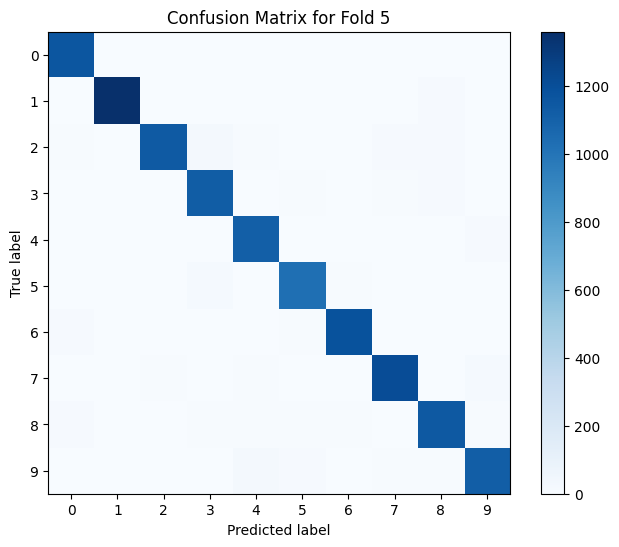

Fold 5 - Accuracy: 0.9654, AUC: 0.9991


In [22]:
for train_index, val_index in kf.split(x):
    # Split data into train and validation for the current fold
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y_onehot[train_index], y_onehot[val_index]

    # Build the model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=32, verbose=1)
    model.summary()

    # Evaluate on validation set
    y_val_pred_proba = model.predict(x_val)  # Predicted probabilities
    y_val_pred = np.argmax(y_val_pred_proba, axis=1)  # Predicted class labels
    y_val_true = np.argmax(y_val, axis=1)  # True class labels

    # Calculate metrics for the current fold
    accuracy = accuracy_score(y_val_true, y_val_pred)
    precision = precision_score(y_val_true, y_val_pred, average='weighted')
    recall = recall_score(y_val_true, y_val_pred, average='weighted')
    f1 = f1_score(y_val_true, y_val_pred, average='weighted')
    conf_matrix = confusion_matrix(y_val_true, y_val_pred)

    # Update metrics storage
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    conf_matrix_sum += conf_matrix

    # Print and plot the Confusion Matrix for the current fold
    print(f"Confusion Matrix for Fold {fold}:")
    print(conf_matrix)

    # Plot Confusion Matrix for the current fold
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, np.arange(10))
    plt.yticks(tick_marks, np.arange(10))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # ROC Curve and AUC for the current fold
    fpr, tpr, _ = roc_curve(y_val.ravel(), y_val_pred_proba.ravel())
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

    print(f"Fold {fold} - Accuracy: {accuracy:.4f}, AUC: {roc_auc:.4f}")
    fold += 1

In [23]:
mean_accuracy = np.mean(accuracy_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1_score = np.mean(f1_list)
mean_roc_auc = np.mean(roc_auc_list)

print(f"\nMean Accuracy from K-Fold Cross Validation: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"Mean F1-Score: {mean_f1_score:.2f}")
print(f"Mean ROC AUC: {mean_roc_auc:.2f}")


Mean Accuracy from K-Fold Cross Validation: 96.75%
Mean Precision: 0.97
Mean Recall: 0.97
Mean F1-Score: 0.97
Mean ROC AUC: 1.00


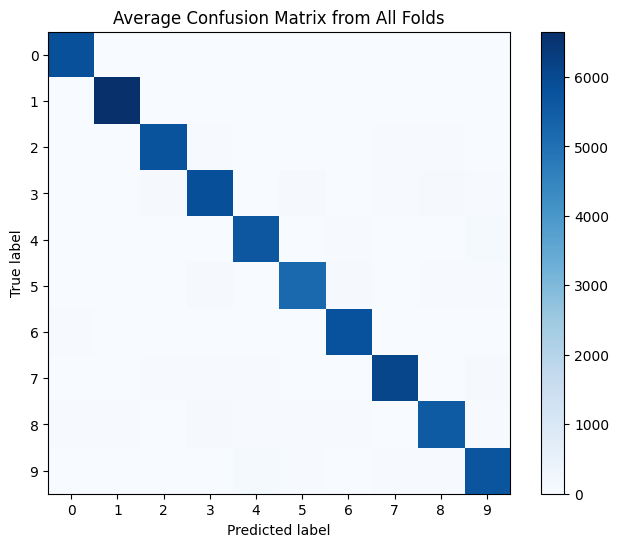

In [24]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_sum, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix from All Folds')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

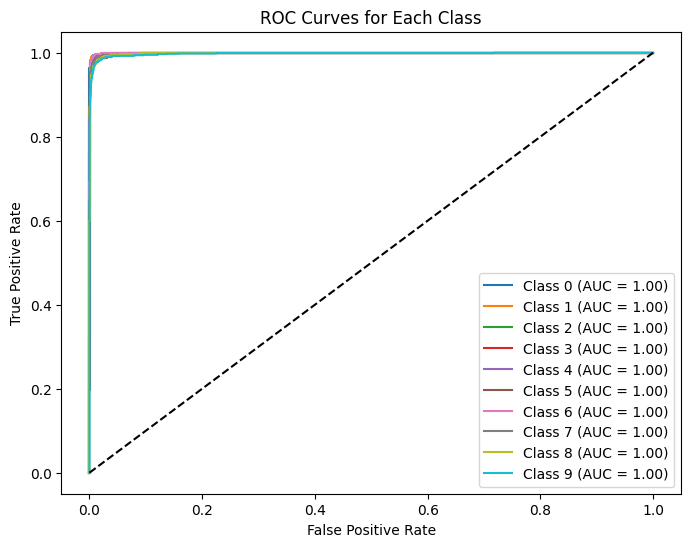

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

num_classes = 10  # MNIST has 10 classes
fpr_dict = {}  # To store false positive rates for each class
tpr_dict = {}  # To store true positive rates for each class
roc_auc_dict = {}  # To store AUC values for each class

# Compute ROC and AUC
for i in range(num_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_val[:, i], y_val_pred_proba[:, i])  # One-vs-all
    roc_auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])

# Plot ROC
plt.figure(figsize=(8,6))
for i in range(num_classes):
    plt.plot(
        fpr_dict[i],
        tpr_dict[i],
        label=f'Class {i} (AUC = {roc_auc_dict[i]:.2f})'
    )

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.show()


Naive Bayes

In [26]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [27]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [28]:
X_train_full = X_train_full.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [29]:
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [30]:
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)

In [31]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
cm_list = []
roc_auc_list = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

In [32]:
for train_index, val_index in kf.split(X_train_full, np.argmax(y_train_full, axis=1)):
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    # Create Naive Bayes model
    nb_model = MultinomialNB()

    # Train the model
    nb_model.fit(X_train, np.argmax(y_train, axis=1))

    # Predict on validation set
    y_val_pred = nb_model.predict(X_val)
    y_val_pred_proba = nb_model.predict_proba(X_val)

    # Calculate metrics
    accuracy = accuracy_score(np.argmax(y_val, axis=1), y_val_pred)
    precision = precision_score(np.argmax(y_val, axis=1), y_val_pred, average='weighted')
    recall = recall_score(np.argmax(y_val, axis=1), y_val_pred, average='weighted')
    f1 = f1_score(np.argmax(y_val, axis=1), y_val_pred, average='weighted')

    # Store results
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_val, axis=1), y_val_pred)
    cm_list.append(cm)

    # ROC Curve and AUC
    fpr_all = {}
    tpr_all = {}
    roc_auc_all = {}

    for i in range(10):  # 10 classes (0-9)
        fpr, tpr, _ = roc_curve(label_binarize(np.argmax(y_val, axis=1), classes=np.arange(10))[:, i], y_val_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        fpr_all[i] = fpr
        tpr_all[i] = tpr
        roc_auc_all[i] = roc_auc

    fold += 1


In [33]:
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")

Average Accuracy: 0.8234
Average Precision: 0.8315
Average Recall: 0.8234
Average F1 Score: 0.8242


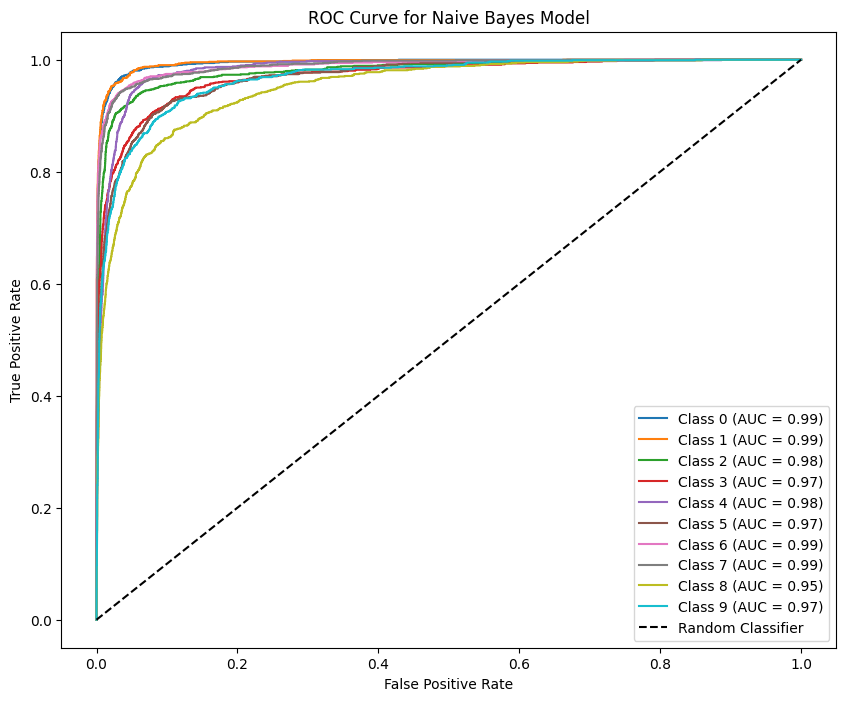

Confusion Matrix for Fold 1:
 [[1081    2    3    2    3   13   16    0   63    1]
 [   0 1278    8    6    1    4    7    0   42    2]
 [  17   15  969   30   14    1   59   11   74    1]
 [   8   29   52 1000    1   26   11   10   62   28]
 [   2    3    4    2  855    6   27    1   60  209]
 [  33   14   12  119   23  704   27    5  114   34]
 [  12   25   15    0    6   28 1087    0   10    0]
 [   6   19    6    5   33    0    0 1039   44  101]
 [   7   82   19   71   14   39   13    2  879   44]
 [   8    9    4   17   57    6    0   40   46 1003]]
Confusion Matrix for Fold 2:
 [[1075    1    6    4    4   24   15    0   54    2]
 [   0 1246   10   10    1   12    6    0   59    5]
 [  16   19 1005   23   16    1   51    5   51    4]
 [   4   24   59 1002    3   20   10    9   56   39]
 [   4    6    8    0  872    4   21    2   45  206]
 [  28   11   10  143   21  719   23    3   85   41]
 [  10   28   19    0    3   33 1082    0    9    0]
 [  16   20    7    5   31    0    0 1

In [34]:
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 8))

for i in range(10):
    plt.plot(fpr_all[i], tpr_all[i], label=f'Class {i} (AUC = {roc_auc_all[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend(loc="lower right")
plt.show()

# Display Confusion Matrices for each fold
for i, cm in enumerate(cm_list):
    print(f"Confusion Matrix for Fold {i+1}:\n", cm)